## Recognizing CIFAR-10 images with Deep Learning (Part II)

CIFAR-10 dataset contains 60,000 color images of size 32*32 pixels which are divided in 10 classes.
We will use Keras library to import the dataset which contains 50,000 images as training iamges
and 10,000 as test images

In [Part I](https://github.com/chhayac/Machine-Learning-Notebooks/blob/master/Recognizing-CIFAR-10-images-Simple-Model.ipynb), we used a simple Convolutional Neural Network model with only one hidden layer. Model gave accuracy of 66.94% on test data. Goal of this part is to improve the accuracy of the model by increasing the number of convolutional layers.

In [27]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Activation, Dropout
import matplotlib.pyplot as plt
% matplotlib inline

In [28]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [41]:
BATCH_SIZE = 128
nb_epochs = 40
VALIDATION_SPLIT = 0.2
num_classes = 10

In [30]:
num_train, img_channels, img_rows, img_cols = X_train.shape
num_test, _, _, _= X_test.shape

In [31]:
print('X_train Shape:', X_train.shape)
training_samples = X_train.shape[0]
print("Training samples:", training_samples)
print("Test Samples:", y_test.shape[0])

X_train Shape: (50000, 32, 32, 3)
Training samples: 50000
Test Samples: 10000


In [32]:
class_names =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

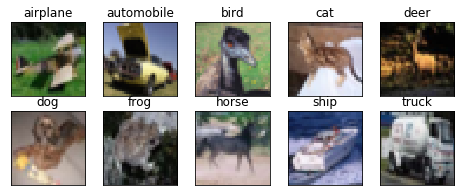

In [33]:
fig = plt.figure(figsize =(8, 3))
for i in range(num_classes):
    axis = fig.add_subplot(2, 5, 1+i, xticks = [], yticks = [])
    idx = np.where(y_train[:] == i)[0]
    features_idx = X_train[idx, ::]
    image_num = np.random.randint(features_idx.shape[0])
    image = features_idx[image_num,::]
    axis.set_title(class_names[i])
    plt.imshow(image)
plt.show()

One hot Encoding

In [34]:
# convert to categorical
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [35]:
#float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [36]:
from keras import backend as K
if K.backend() == 'tensorflow':
    K.set_image_dim_ordering('tf')

Building sequential model

In [37]:
# Network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))

# Adding more layers to improve the model
model.add(Conv2D(32, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))
model.add(Dropout(0.25))

In [38]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_43 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_44 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 64)        18496     
__________

Compiling the model

In [39]:
model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

Training the model

In [42]:
model_history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = nb_epochs, 
          validation_split = VALIDATION_SPLIT, verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 18s 440us/step - loss: 1.5278 - acc: 0.4518 - val_loss: 1.6131 - val_acc: 0.4525
Epoch 2/40
40000/40000 [==============================] - 17s 419us/step - loss: 1.2531 - acc: 0.5565 - val_loss: 1.1684 - val_acc: 0.5918
Epoch 3/40
40000/40000 [==============================] - 17s 417us/step - loss: 1.0798 - acc: 0.6193 - val_loss: 1.0287 - val_acc: 0.6417
Epoch 4/40
40000/40000 [==============================] - 16s 409us/step - loss: 0.9607 - acc: 0.6632 - val_loss: 0.9146 - val_acc: 0.6791
Epoch 5/40
40000/40000 [==============================] - 16s 408us/step - loss: 0.8759 - acc: 0.6944 - val_loss: 0.8480 - val_acc: 0.6947
Epoch 6/40
40000/40000 [==============================] - 17s 425us/step - loss: 0.8091 - acc: 0.7160 - val_loss: 0.8278 - val_acc: 0.7159
Epoch 7/40
40000/40000 [==============================] - 18s 447us/step - loss: 0.7535 - acc: 0.7385 - val_loss: 0.

List all data in history

In [43]:
print(model_history.history.keys())

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])


Summarize history for accuracy

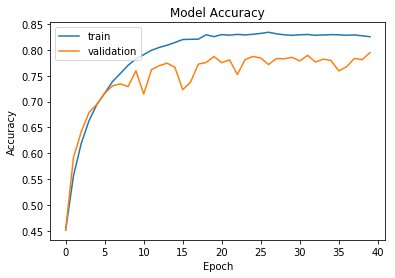

In [44]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

Summarize history for loss

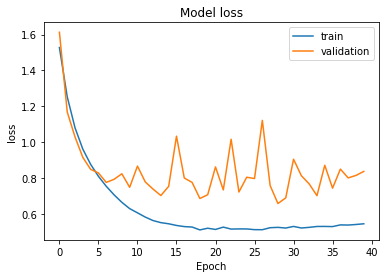

In [45]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc = 'upper right')
plt.show()

In [46]:
score = model.evaluate(X_test, y_test, batch_size = BATCH_SIZE, verbose =1)

10000/10000 [==============================] - 2s 179us/step


In [47]:
print("Test Score", score[0])
print("Test accuracy", score[1])

Test Score 0.880404548073
Test accuracy 0.7865


This accuracy is 12% better than what we got in Part I.